In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

covid_data = "Resources/CovidNumbers.csv"
March_2019_turnstile = "Resources/Turnstile_190330.csv"
March_2020_turnstile = "Resources/Turnstile_200328.csv"

In [2]:
#data-by-modzcta.csv
#This file contains data by modified ZIP code tabulation areas (ZCTA). 
#This unit of geography is similar to ZIP codes but combines census blocks with smaller populations to allow more stable estimates of population size for rate calculation. 
#Please see description of modified ZCTAs in the technical notes section (Geography: Zip codes and ZCTAs).
#data as of 9/25/20

covid_pd = pd.read_csv(covid_data, header = 8)

covid_pd.head()

,\outl0\strokewidth0 \strokec2 MODIFIED_ZCTA,NEIGHBORHOOD_NAME,BOROUGH_GROUP,COVID_CASE_COUNT,COVID_CASE_RATE,POP_DENOMINATOR,COVID_DEATH_COUNT,COVID_DEATH_RATE,PERCENT_POSITIVE,TOTAL_COVID_TESTS\
0,10001,Chelsea/NoMad/West Chelsea,Manhattan,459.0,1947.97,23563.03,27.0,114.59,5.53,8299\
1,10002,Chinatown/Lower East Side,Manhattan,1371.0,1786.19,76755.41,161.0,209.76,6.61,20729\
2,10003,East Village/Gramercy/Greenwich Village,Manhattan,584.0,1085.47,53801.62,35.0,65.05,3.07,19041\
3,10004,Financial District,Manhattan,45.0,1232.67,3650.61,1.0,27.39,4.43,1015\
4,10005,Financial District,Manhattan,109.0,1298.22,8396.11,2.0,23.82,4.24,2569\


In [3]:
#rename the column
covid_clean_df = covid_pd.rename(columns = {"\outl0\strokewidth0 \strokec2 MODIFIED_ZCTA": "Modified_ZCTA"})
covid_clean_df.head()

,Modified_ZCTA,NEIGHBORHOOD_NAME,BOROUGH_GROUP,COVID_CASE_COUNT,COVID_CASE_RATE,POP_DENOMINATOR,COVID_DEATH_COUNT,COVID_DEATH_RATE,PERCENT_POSITIVE,TOTAL_COVID_TESTS\
0,10001,Chelsea/NoMad/West Chelsea,Manhattan,459.0,1947.97,23563.03,27.0,114.59,5.53,8299\
1,10002,Chinatown/Lower East Side,Manhattan,1371.0,1786.19,76755.41,161.0,209.76,6.61,20729\
2,10003,East Village/Gramercy/Greenwich Village,Manhattan,584.0,1085.47,53801.62,35.0,65.05,3.07,19041\
3,10004,Financial District,Manhattan,45.0,1232.67,3650.61,1.0,27.39,4.43,1015\
4,10005,Financial District,Manhattan,109.0,1298.22,8396.11,2.0,23.82,4.24,2569\


In [4]:
#covid case rate
columns_to_extract = ["Modified_ZCTA", "NEIGHBORHOOD_NAME", "BOROUGH_GROUP", "COVID_CASE_RATE"]
covid_case_rate = pd.DataFrame(covid_clean_df, columns = columns_to_extract)

covid_case_rate.shape

(178, 4)

In [5]:
covid_case_rate.head()

,Modified_ZCTA,NEIGHBORHOOD_NAME,BOROUGH_GROUP,COVID_CASE_RATE
0,10001,Chelsea/NoMad/West Chelsea,Manhattan,1947.97
1,10002,Chinatown/Lower East Side,Manhattan,1786.19
2,10003,East Village/Gramercy/Greenwich Village,Manhattan,1085.47
3,10004,Financial District,Manhattan,1232.67
4,10005,Financial District,Manhattan,1298.22


In [6]:
covid_case_rate = covid_case_rate.sort_values(by=["COVID_CASE_RATE"], ascending = False)

covid_case_rate.head()

,Modified_ZCTA,NEIGHBORHOOD_NAME,BOROUGH_GROUP,COVID_CASE_RATE
140,11369,Airport/East Elmhurst,Queens,4837.88
125,11239,East New York,Brooklyn,4688.49
139,11368,Corona/North Corona,Queens,4627.48
74,10469,Allerton/Baychester/Pelham Gardens/Williamsbridge,Bronx,4602.27
142,11372,Jackson Heights,Queens,4561.81


In [7]:
covid_case_max = covid_case_rate.nlargest(4, "COVID_CASE_RATE")

print(covid_case_max.shape)

covid_case_max.head()

(4, 4)


,Modified_ZCTA,NEIGHBORHOOD_NAME,BOROUGH_GROUP,COVID_CASE_RATE
140,11369,Airport/East Elmhurst,Queens,4837.88
125,11239,East New York,Brooklyn,4688.49
139,11368,Corona/North Corona,Queens,4627.48
74,10469,Allerton/Baychester/Pelham Gardens/Williamsbridge,Bronx,4602.27


In [8]:
covid_case_min = covid_case_rate.nsmallest(4, "COVID_CASE_RATE")
print(covid_case_min.shape)

covid_case_min.head()

(4, 4)


,Modified_ZCTA,NEIGHBORHOOD_NAME,BOROUGH_GROUP,COVID_CASE_RATE
42,10280,Battery Park City,Manhattan,675.77
6,10007,TriBeCa,Manhattan,933.36
10,10012,Greenwich Village/SoHo,Manhattan,1000.78
102,11215,Gowanus/Park Slope/Windsor Terrace,Brooklyn,1042.44


In [9]:
march_2019_data = pd.read_csv(March_2019_turnstile, header = 9)
march_2019_data.head()

,\outl0\strokewidth0 \strokec2 C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,DAY,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,3/23/19,SUNDAY,0:00:00,REGULAR,6989774.0,0002370411 ...
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,3/23/19,SUNDAY,4:00:00,REGULAR,6989795.0,0002370413 ...
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,3/23/19,SUNDAY,8:00:00,REGULAR,6989813.0,0002370436 ...
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,3/23/19,SUNDAY,12:00:00,REGULAR,6989924.0,0002370512 ...
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,3/23/19,SUNDAY,16:00:00,REGULAR,6990200.0,0002370573 ...


In [10]:
march_2020_data = pd.read_csv(March_2020_turnstile, header = 9)
march_2020_data.head()

,\outl0\strokewidth0 \strokec2 C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,DAY,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,3/21/20,SUNDAY,0:00:00,REGULAR,7411940.0,2515962.0
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,3/21/20,SUNDAY,4:00:00,REGULAR,7411942.0,2515966.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,3/21/20,SUNDAY,8:00:00,REGULAR,7411945.0,2515979.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,3/21/20,SUNDAY,12:00:00,REGULAR,7411969.0,2516000.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,3/21/20,SUNDAY,16:00:00,REGULAR,7412028.0,2516024.0


In [11]:
march_2019_data.columns
mar_2019 = march_2019_data.columns[-1]
march_2019_data = march_2019_data.rename(columns = {mar_2019: "EXIT"})
columns_to_use = ['SCP', 'STATION','LINENAME', 'DATE', 'TIME', 'DESC', 'ENTRIES','EXIT']
march_2019_df = pd.DataFrame(march_2019_data, columns = columns_to_use)

march_2019_df.head()

,SCP,STATION,LINENAME,DATE,TIME,DESC,ENTRIES,EXIT
0,02-00-00,59 ST,NQR456W,3/23/19,0:00:00,REGULAR,6989774.0,0002370411 ...
1,02-00-00,59 ST,NQR456W,3/23/19,4:00:00,REGULAR,6989795.0,0002370413 ...
2,02-00-00,59 ST,NQR456W,3/23/19,8:00:00,REGULAR,6989813.0,0002370436 ...
3,02-00-00,59 ST,NQR456W,3/23/19,12:00:00,REGULAR,6989924.0,0002370512 ...
4,02-00-00,59 ST,NQR456W,3/23/19,16:00:00,REGULAR,6990200.0,0002370573 ...


In [12]:
newdf_2019 = march_2019_df.loc[(march_2019_df["STATION"] == "E 180 ST") |
                          (march_2019_df["STATION"] == "86 ST-2 AVE") |
                          (march_2019_df["STATION"] == "96 ST") |
                          (march_2019_df["STATION"] == "CITY HALL") |
                             (march_2019_df["STATION"] == "ATL AV-BARCLAY") |
                             (march_2019_df["STATION"] == "W 4 ST-WASH SQ") |
                              (march_2019_df["STATION"] == "BROADWAY JCT") |
                               (march_2019_df["STATION"] == "JKSN HT-ROOSVLT") |
                                (march_2019_df["STATION"] == "WORLD TRADE CTR") |
                                 (march_2019_df["STATION"] == "QUEENSBORO PLZ")]
newdf_2019

,SCP,STATION,LINENAME,DATE,TIME,DESC,ENTRIES,EXIT
8271,00-00-00,CITY HALL,NRW,3/23/19,0:00:00,REGULAR,7127334.0,0004371361 ...
8272,00-00-00,CITY HALL,NRW,3/23/19,4:00:00,REGULAR,7127338.0,0004371367 ...
8273,00-00-00,CITY HALL,NRW,3/23/19,8:00:00,REGULAR,7127339.0,0004371370 ...
8274,00-00-00,CITY HALL,NRW,3/23/19,12:00:00,REGULAR,7127356.0,0004371391 ...
8275,00-00-00,CITY HALL,NRW,3/23/19,16:00:00,REGULAR,7127390.0,0004371434 ...
...,...,...,...,...,...,...,...,...
194564,1/5/01,ATL AV-BARCLAY,BDNQR2345,3/29/19,9:47:43,REGULAR,117440512.0,0000000162 \
194565,1/5/01,ATL AV-BARCLAY,BDNQR2345,3/29/19,11:00:32,REGULAR,117440512.0,0000000162 \
194566,1/5/01,ATL AV-BARCLAY,BDNQR2345,3/29/19,12:00:00,REGULAR,117440512.0,0000000162 \
194567,1/5/01,ATL AV-BARCLAY,BDNQR2345,3/29/19,16:00:00,REGULAR,117440512.0,0000000162 \


In [13]:
march_2020_data.columns
mar_2020 = march_2020_data.columns[-1]
march_2020_data = march_2020_data.rename(columns = {mar_2020: "EXIT"})
columns_to_use = ['SCP', 'STATION','LINENAME', 'DATE', 'TIME', 'DESC', 'ENTRIES','EXIT']
march_2020_df = pd.DataFrame(march_2020_data, columns = columns_to_use)

march_2020_df.head()

,SCP,STATION,LINENAME,DATE,TIME,DESC,ENTRIES,EXIT
0,02-00-00,59 ST,NQR456W,3/21/20,0:00:00,REGULAR,7411940.0,2515962.0
1,02-00-00,59 ST,NQR456W,3/21/20,4:00:00,REGULAR,7411942.0,2515966.0
2,02-00-00,59 ST,NQR456W,3/21/20,8:00:00,REGULAR,7411945.0,2515979.0
3,02-00-00,59 ST,NQR456W,3/21/20,12:00:00,REGULAR,7411969.0,2516000.0
4,02-00-00,59 ST,NQR456W,3/21/20,16:00:00,REGULAR,7412028.0,2516024.0


In [14]:
newdf_2020 = march_2020_df.loc[(march_2020_df["STATION"] == "E 180 ST") |
                          (march_2020_df["STATION"] == "86 ST-2 AVE") |
                          (march_2020_df["STATION"] == "96 ST") |
                          (march_2020_df["STATION"] == "CITY HALL") |
                             (march_2020_df["STATION"] == "ATL AV-BARCLAY") |
                             (march_2020_df["STATION"] == "W 4 ST-WASH SQ") |
                              (march_2020_df["STATION"] == "BROADWAY JCT") |
                               (march_2020_df["STATION"] == "JKSN HT-ROOSVLT") |
                                (march_2020_df["STATION"] == "WORLD TRADE CTR") |
                                 (march_2020_df["STATION"] == "QUEENSBORO PLZ")]
newdf_2020

,SCP,STATION,LINENAME,DATE,TIME,DESC,ENTRIES,EXIT
8032,00-00-00,CITY HALL,NRW,3/21/20,0:00:00,REGULAR,5524.0,5348.0
8033,00-00-00,CITY HALL,NRW,3/21/20,4:00:00,REGULAR,5524.0,5350.0
8034,00-00-00,CITY HALL,NRW,3/21/20,8:00:00,REGULAR,5524.0,5352.0
8035,00-00-00,CITY HALL,NRW,3/21/20,12:00:00,REGULAR,5527.0,5357.0
8036,00-00-00,CITY HALL,NRW,3/21/20,16:00:00,REGULAR,5536.0,5365.0
...,...,...,...,...,...,...,...,...
197531,1/5/01,ATL AV-BARCLAY,BDNQR2345,3/27/20,4:00:00,REGULAR,117440512.0,192.0
197532,1/5/01,ATL AV-BARCLAY,BDNQR2345,3/27/20,8:00:00,REGULAR,117440512.0,192.0
197533,1/5/01,ATL AV-BARCLAY,BDNQR2345,3/27/20,12:00:00,REGULAR,117440512.0,192.0
197534,1/5/01,ATL AV-BARCLAY,BDNQR2345,3/27/20,16:00:00,REGULAR,117440512.0,192.0


In [15]:
march_2019_max = newdf_2019.groupby(["STATION", "LINENAME","SCP"]).max()

march_2019_max

DATE     TIME     DESC     ENTRIES  \
STATION         LINENAME SCP                                               
86 ST-2 AVE     Q        00-00-00  3/29/19  9:00:00  REGULAR   3652121.0   
                         00-00-01  3/29/19  9:00:00  REGULAR   2671740.0   
                         00-00-02  3/29/19  9:00:00  REGULAR   2141046.0   
                         00-00-03  3/29/19  9:00:00  REGULAR   1322707.0   
                         00-05-00  3/29/19  9:00:00  REGULAR  36570013.0   
...                                    ...      ...      ...         ...   
WORLD TRADE CTR ACE23    1/5/01    3/29/19  8:00:00  REGULAR         0.0   
                         1/6/00    3/25/19  8:00:00  REGULAR    261000.0   
                         1/6/01    3/29/19  8:00:00  REGULAR    100900.0   
                         1/6/02    3/29/19  8:00:00  REGULAR    604961.0   
                         1/6/03    3/29/19  8:00:00  REGULAR    140171.0   

                                                                                EXIT  
STATION         LINENAME SCP                                                          
86 ST-2 AVE     Q        00-00-00  0002153115                                    ...  
                         00-00-01  0001177733                                    ...  
                         00-00-02  0001084700                                    ...  
                         00-00-03  0000951102                                    ...  
                         00-05-00  0050331652                                    ...  
...                                                                              ...  
WORLD TRADE CTR ACE23    1/5/01      0000000694                                    \  
                         1/6/00      0000060649                                    \  
                         1/6/01      0000022901                                    \  
                         1/6/02      0000159598                                    \  
                         1/6/03      0000067081                                    \  

[187 rows x 5 columns]

In [16]:
march_2020_max = newdf_2020.groupby(["STATION", "LINENAME", "SCP"]).max()

march_2020_max

DATE     TIME     DESC     ENTRIES  \
STATION         LINENAME SCP                                               
86 ST-2 AVE     Q        00-00-00  3/27/20  9:00:00  REGULAR   5302061.0   
                         00-00-01  3/27/20  9:00:00  REGULAR   3876825.0   
                         00-00-02  3/27/20  9:00:00  REGULAR   3073461.0   
                         00-00-03  3/27/20  9:00:00  REGULAR   2042798.0   
                         00-05-00  3/27/20  9:00:00  REGULAR  36570313.0   
...                                    ...      ...      ...         ...   
WORLD TRADE CTR ACE23    1/5/01    3/27/20  8:00:00  REGULAR         0.0   
                         1/6/00    3/27/20  8:00:00  REGULAR    403205.0   
                         1/6/01    3/27/20  8:00:00  REGULAR    401947.0   
                         1/6/02    3/27/20  8:00:00  REGULAR   1033710.0   
                         1/6/03    3/27/20  8:00:00  REGULAR    619858.0   

                                         EXIT  
STATION         LINENAME SCP                   
86 ST-2 AVE     Q        00-00-00   2988082.0  
                         00-00-01   1629249.0  
                         00-00-02   1544023.0  
                         00-00-03   1461538.0  
                         00-05-00  50331652.0  
...                                       ...  
WORLD TRADE CTR ACE23    1/5/01         708.0  
                         1/6/00      107304.0  
                         1/6/01       92897.0  
                         1/6/02      281265.0  
                         1/6/03      307132.0  

[189 rows x 5 columns]

In [17]:
march_2019_min = newdf_2019.groupby(["STATION", "LINENAME", "SCP"]).min()

march_2019_min

DATE      TIME     DESC     ENTRIES  \
STATION         LINENAME SCP                                                
86 ST-2 AVE     Q        00-00-00  3/23/19  13:00:00  REGULAR   3619381.0   
                         00-00-01  3/23/19  13:00:00  REGULAR   2648355.0   
                         00-00-02  3/23/19  13:00:00  REGULAR   2122526.0   
                         00-00-03  3/23/19  13:00:00  REGULAR   1309084.0   
                         00-05-00  3/23/19  13:00:00  REGULAR  36570002.0   
...                                    ...       ...      ...         ...   
WORLD TRADE CTR ACE23    1/5/01    3/23/19   0:00:00  REGULAR         0.0   
                         1/6/00    3/23/19   0:00:00  REGULAR    260549.0   
                         1/6/01    3/23/19   0:00:00  REGULAR     95007.0   
                         1/6/02    3/23/19   0:00:00  REGULAR    597179.0   
                         1/6/03    3/23/19   0:00:00  REGULAR    131580.0   

                                                                                EXIT  
STATION         LINENAME SCP                                                          
86 ST-2 AVE     Q        00-00-00  0002134693                                    ...  
                         00-00-01  0001167294                                    ...  
                         00-00-02  0001074938                                    ...  
                         00-00-03  0000941007                                    ...  
                         00-05-00  0050331652                                    ...  
...                                                                              ...  
WORLD TRADE CTR ACE23    1/5/01      0000000694                                    \  
                         1/6/00      0000060511                                    \  
                         1/6/01      0000021789                                    \  
                         1/6/02      0000157812                                    \  
                         1/6/03      0000063117                                    \  

[187 rows x 5 columns]

In [18]:
march_2020_min = newdf_2020.groupby(["STATION", "LINENAME", "SCP"]).min()

march_2020_min

DATE      TIME     DESC     ENTRIES  \
STATION         LINENAME SCP                                                
86 ST-2 AVE     Q        00-00-00  3/21/20  13:00:00  REGULAR   5298209.0   
                         00-00-01  3/21/20  13:00:00  REGULAR   3875060.0   
                         00-00-02  3/21/20  13:00:00  REGULAR   3072294.0   
                         00-00-03  3/21/20  13:00:00  REGULAR   2042042.0   
                         00-05-00  3/21/20  13:00:00  REGULAR  36570309.0   
...                                    ...       ...      ...         ...   
WORLD TRADE CTR ACE23    1/5/01    3/21/20   0:00:00  REGULAR         0.0   
                         1/6/00    3/21/20   0:00:00  REGULAR    403048.0   
                         1/6/01    3/21/20   0:00:00  REGULAR    401628.0   
                         1/6/02    3/21/20   0:00:00  REGULAR   1032921.0   
                         1/6/03    3/21/20   0:00:00  REGULAR    619150.0   

                                         EXIT  
STATION         LINENAME SCP                   
86 ST-2 AVE     Q        00-00-00   2984796.0  
                         00-00-01   1627996.0  
                         00-00-02   1542951.0  
                         00-00-03   1460301.0  
                         00-05-00  50331652.0  
...                                       ...  
WORLD TRADE CTR ACE23    1/5/01         708.0  
                         1/6/00      107204.0  
                         1/6/01       92786.0  
                         1/6/02      280985.0  
                         1/6/03      306313.0  

[189 rows x 5 columns]

In [19]:
march_2019_merge = pd.merge(march_2019_max, march_2019_min, on = ["STATION", "LINENAME", "SCP"], how = "left")

march_2019_merge

DATE_x   TIME_x   DESC_x   ENTRIES_x  \
STATION         LINENAME SCP                                               
86 ST-2 AVE     Q        00-00-00  3/29/19  9:00:00  REGULAR   3652121.0   
                         00-00-01  3/29/19  9:00:00  REGULAR   2671740.0   
                         00-00-02  3/29/19  9:00:00  REGULAR   2141046.0   
                         00-00-03  3/29/19  9:00:00  REGULAR   1322707.0   
                         00-05-00  3/29/19  9:00:00  REGULAR  36570013.0   
...                                    ...      ...      ...         ...   
WORLD TRADE CTR ACE23    1/5/01    3/29/19  8:00:00  REGULAR         0.0   
                         1/6/00    3/25/19  8:00:00  REGULAR    261000.0   
                         1/6/01    3/29/19  8:00:00  REGULAR    100900.0   
                         1/6/02    3/29/19  8:00:00  REGULAR    604961.0   
                         1/6/03    3/29/19  8:00:00  REGULAR    140171.0   

                                                                              EXIT_x  \
STATION         LINENAME SCP                                                           
86 ST-2 AVE     Q        00-00-00  0002153115                                    ...   
                         00-00-01  0001177733                                    ...   
                         00-00-02  0001084700                                    ...   
                         00-00-03  0000951102                                    ...   
                         00-05-00  0050331652                                    ...   
...                                                                              ...   
WORLD TRADE CTR ACE23    1/5/01      0000000694                                    \   
                         1/6/00      0000060649                                    \   
                         1/6/01      0000022901                                    \   
                         1/6/02      0000159598                                    \   
                         1/6/03      0000067081                                    \   

                                    DATE_y    TIME_y   DESC_y   ENTRIES_y  \
STATION         LINENAME SCP                                                
86 ST-2 AVE     Q        00-00-00  3/23/19  13:00:00  REGULAR   3619381.0   
                         00-00-01  3/23/19  13:00:00  REGULAR   2648355.0   
                         00-00-02  3/23/19  13:00:00  REGULAR   2122526.0   
                         00-00-03  3/23/19  13:00:00  REGULAR   1309084.0   
                         00-05-00  3/23/19  13:00:00  REGULAR  36570002.0   
...                                    ...       ...      ...         ...   
WORLD TRADE CTR ACE23    1/5/01    3/23/19   0:00:00  REGULAR         0.0   
                         1/6/00    3/23/19   0:00:00  REGULAR    260549.0   
                         1/6/01    3/23/19   0:00:00  REGULAR     95007.0   
                         1/6/02    3/23/19   0:00:00  REGULAR    597179.0   
                         1/6/03    3/23/19   0:00:00  REGULAR    131580.0   

                                                                              EXIT_y  
STATION         LINENAME SCP                                                          
86 ST-2 AVE     Q        00-00-00  0002134693                                    ...  
                         00-00-01  0001167294                                    ...  
                         00-00-02  0001074938                                    ...  
                         00-00-03  0000941007                                    ...  
                         00-05-00  0050331652                                    ...  
...                                                                              ...  
WORLD TRADE CTR ACE23    1/5/01      0000000694                                    \  
                         1/6/00      0000060511                                    \  
                         1/6/0

In [20]:
march_2020_merge = pd.merge(march_2020_max, march_2020_min, on = ["STATION", "SCP"], how = "left")

march_2020_merge

DATE_x   TIME_x   DESC_x   ENTRIES_x      EXIT_x  \
STATION         SCP                                                           
86 ST-2 AVE     00-00-00  3/27/20  9:00:00  REGULAR   5302061.0   2988082.0   
                00-00-01  3/27/20  9:00:00  REGULAR   3876825.0   1629249.0   
                00-00-02  3/27/20  9:00:00  REGULAR   3073461.0   1544023.0   
                00-00-03  3/27/20  9:00:00  REGULAR   2042798.0   1461538.0   
                00-05-00  3/27/20  9:00:00  REGULAR  36570313.0  50331652.0   
...                           ...      ...      ...         ...         ...   
WORLD TRADE CTR 1/5/01    3/27/20  8:00:00  REGULAR         0.0       708.0   
                1/6/00    3/27/20  8:00:00  REGULAR    403205.0    107304.0   
                1/6/01    3/27/20  8:00:00  REGULAR    401947.0     92897.0   
                1/6/02    3/27/20  8:00:00  REGULAR   1033710.0    281265.0   
                1/6/03    3/27/20  8:00:00  REGULAR    619858.0    307132.0   

                           DATE_y    TIME_y   DESC_y   ENTRIES_y      EXIT_y  
STATION         SCP                                                           
86 ST-2 AVE     00-00-00  3/21/20  13:00:00  REGULAR   5298209.0   2984796.0  
                00-00-01  3/21/20  13:00:00  REGULAR   3875060.0   1627996.0  
                00-00-02  3/21/20  13:00:00  REGULAR   3072294.0   1542951.0  
                00-00-03  3/21/20  13:00:00  REGULAR   2042042.0   1460301.0  
                00-05-00  3/21/20  13:00:00  REGULAR  36570309.0  50331652.0  
...                           ...       ...      ...         ...         ...  
WORLD TRADE CTR 1/5/01    3/21/20   0:00:00  REGULAR         0.0       708.0  
                1/6/00    3/21/20   0:00:00  REGULAR    403048.0    107204.0  
                1/6/01    3/21/20   0:00:00  REGULAR    401628.0     92786.0  
                1/6/02    3/21/20   0:00:00  REGULAR   1032921.0    280985.0  
                1/6/03    3/21/20   0:00:00  REGULAR    619150.0    306313.0  

[219 rows x 10 columns]

In [21]:
march_2019_merge["ENTRIES CHANGE"] = march_2019_merge["ENTRIES_x"] - march_2019_merge["ENTRIES_y"]
march_2019_merge = march_2019_merge.reset_index()
march_2019_merge.head(10)

,STATION,LINENAME,SCP,DATE_x,TIME_x,DESC_x,ENTRIES_x,EXIT_x,DATE_y,TIME_y,DESC_y,ENTRIES_y,EXIT_y,ENTRIES CHANGE
0,86 ST-2 AVE,Q,00-00-00,3/29/19,9:00:00,REGULAR,3652121.0,0002153115 ...,3/23/19,13:00:00,REGULAR,3619381.0,0002134693 ...,32740.0
1,86 ST-2 AVE,Q,00-00-01,3/29/19,9:00:00,REGULAR,2671740.0,0001177733 ...,3/23/19,13:00:00,REGULAR,2648355.0,0001167294 ...,23385.0
2,86 ST-2 AVE,Q,00-00-02,3/29/19,9:00:00,REGULAR,2141046.0,0001084700 ...,3/23/19,13:00:00,REGULAR,2122526.0,0001074938 ...,18520.0
3,86 ST-2 AVE,Q,00-00-03,3/29/19,9:00:00,REGULAR,1322707.0,0000951102 ...,3/23/19,13:00:00,REGULAR,1309084.0,0000941007 ...,13623.0
4,86 ST-2 AVE,Q,00-05-00,3/29/19,9:00:00,REGULAR,36570013.0,0050331652 ...,3/23/19,13:00:00,REGULAR,36570002.0,0050331652 ...,11.0
5,86 ST-2 AVE,Q,00-05-01,3/29/19,9:00:00,REGULAR,458752.0,0000000066 ...,3/23/19,13:00:00,REGULAR,458752.0,0000000065 ...,0.0
6,86 ST-2 AVE,Q,01-00-00,3/29/19,9:50:11,REGULAR,66549.0,0000908216 ...,3/23/19,11:02:58,REGULAR,65891.0,0000899912 ...,658.0
7,86 ST-2 AVE,Q,01-00-01,3/29/19,9:50:11,REGULAR,122315.0,0000642032 ...,3/23/19,11:02:58,REGULAR,121079.0,0000636423 ...,1236.0
8,86 ST-2 AVE,Q,01-00-02,3/29/19,9:50:11,REGULAR,223483.0,0000520022 ...,3/23/19,11:02:58,REGULAR,221180.0,0000515389 ...,2303.0
9,86 ST-2 AVE,Q,01-00-03,3/29/19,9:50:11,REGULAR,306748.0,0000351467 ...,3/23/19,11:02:58,REGULAR,303133.0,0000347681 ...,3615.0


In [22]:
march_2020_merge["ENTRIES CHANGE"] = march_2020_merge["ENTRIES_x"] - march_2020_merge["ENTRIES_y"]
march_2020_merge = march_2020_merge.reset_index()
march_2020_merge.head(10)

,STATION,SCP,DATE_x,TIME_x,DESC_x,ENTRIES_x,EXIT_x,DATE_y,TIME_y,DESC_y,ENTRIES_y,EXIT_y,ENTRIES CHANGE
0,86 ST-2 AVE,00-00-00,3/27/20,9:00:00,REGULAR,5302061.0,2988082.0,3/21/20,13:00:00,REGULAR,5298209.0,2984796.0,3852.0
1,86 ST-2 AVE,00-00-01,3/27/20,9:00:00,REGULAR,3876825.0,1629249.0,3/21/20,13:00:00,REGULAR,3875060.0,1627996.0,1765.0
2,86 ST-2 AVE,00-00-02,3/27/20,9:00:00,REGULAR,3073461.0,1544023.0,3/21/20,13:00:00,REGULAR,3072294.0,1542951.0,1167.0
3,86 ST-2 AVE,00-00-03,3/27/20,9:00:00,REGULAR,2042798.0,1461538.0,3/21/20,13:00:00,REGULAR,2042042.0,1460301.0,756.0
4,86 ST-2 AVE,00-05-00,3/27/20,9:00:00,REGULAR,36570313.0,50331652.0,3/21/20,13:00:00,REGULAR,36570309.0,50331652.0,4.0
5,86 ST-2 AVE,00-05-01,3/27/20,9:00:00,REGULAR,458752.0,133.0,3/21/20,13:00:00,REGULAR,458752.0,133.0,0.0
6,86 ST-2 AVE,01-00-00,3/27/20,9:00:00,REGULAR,103960.0,1329962.0,3/21/20,13:00:00,REGULAR,103936.0,1329533.0,24.0
7,86 ST-2 AVE,01-00-01,3/27/20,9:00:00,REGULAR,190957.0,925693.0,3/21/20,13:00:00,REGULAR,190897.0,925366.0,60.0
8,86 ST-2 AVE,01-00-02,3/27/20,9:00:00,REGULAR,344317.0,748339.0,3/21/20,13:00:00,REGULAR,344203.0,748079.0,114.0
9,86 ST-2 AVE,01-00-03,3/27/20,9:00:00,REGULAR,487638.0,537500.0,3/21/20,13:00:00,REGULAR,487438.0,537315.0,200.0


In [23]:
columns_to_use = ['STATION','ENTRIES CHANGE']
march_2019_entries = pd.DataFrame(march_2019_merge, columns = columns_to_use)
march_2019_entries

,STATION,ENTRIES CHANGE
0,86 ST-2 AVE,32740.0
1,86 ST-2 AVE,23385.0
2,86 ST-2 AVE,18520.0
3,86 ST-2 AVE,13623.0
4,86 ST-2 AVE,11.0
...,...,...
182,WORLD TRADE CTR,0.0
183,WORLD TRADE CTR,451.0
184,WORLD TRADE CTR,5893.0
185,WORLD TRADE CTR,7782.0


In [24]:
columns_to_use = ['STATION','ENTRIES CHANGE']
march_2020_entries = pd.DataFrame(march_2020_merge, columns = columns_to_use)
march_2020_entries

,STATION,ENTRIES CHANGE
0,86 ST-2 AVE,3852.0
1,86 ST-2 AVE,1765.0
2,86 ST-2 AVE,1167.0
3,86 ST-2 AVE,756.0
4,86 ST-2 AVE,4.0
...,...,...
214,WORLD TRADE CTR,0.0
215,WORLD TRADE CTR,157.0
216,WORLD TRADE CTR,319.0
217,WORLD TRADE CTR,789.0


In [25]:
station_change = march_2019_entries.groupby(["STATION"]).sum()["ENTRIES CHANGE"].rename("TOTAL ENTRIES")
change_2019df = pd.DataFrame(station_change)
change_2019df['TOTAL ENTRIES'] = change_2019df['TOTAL ENTRIES'].astype('int64')
change_2019df

,TOTAL ENTRIES
STATION,
86 ST-2 AVE,159528
96 ST,382718
ATL AV-BARCLAY,268299
BROADWAY JCT,55019
CITY HALL,35982
E 180 ST,44292
JKSN HT-ROOSVLT,317551
QUEENSBORO PLZ,114158
W 4 ST-WASH SQ,265487


In [26]:
station_change = march_2020_entries.groupby(["STATION"]).sum()["ENTRIES CHANGE"].rename("TOTAL ENTRIES")
change_2020df = pd.DataFrame(station_change)
change_2020df['TOTAL ENTRIES'] = change_2020df['TOTAL ENTRIES'].astype('int64')
change_2020df

,TOTAL ENTRIES
STATION,
86 ST-2 AVE,12829
96 ST,104596
ATL AV-BARCLAY,37918
BROADWAY JCT,18936
CITY HALL,2329
E 180 ST,14040
JKSN HT-ROOSVLT,53313
QUEENSBORO PLZ,11877
W 4 ST-WASH SQ,18250


In [27]:
total_2019 = change_2019df["TOTAL ENTRIES"].sum()
total_2020 = change_2020df["TOTAL ENTRIES"].sum()

march_ridership = pd.DataFrame({"2019": [total_2019], "2020": [total_2020]})
march_ridership['2019'] = march_ridership['2019'].astype('int64')
march_ridership['2020'] = march_ridership['2020'].astype('int64')

march_ridership.head()

,2019,2020
0,1733907,280988


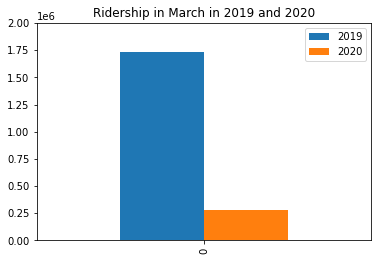

In [28]:
#the data for 2019 is much higher due to Chamber Street.
march_chart = march_ridership.plot(kind ="bar", title = "Ridership in March in 2019 and 2020")
plt.ylim(0, 2000000)

plt.savefig("Resources/Ridership at March in 2019 & 2020.png")
plt.show()

In [29]:
march_change = pd.merge(change_2019df, change_2020df, on = "STATION", how = "outer")

march_change

,TOTAL ENTRIES_x,TOTAL ENTRIES_y
STATION,,
86 ST-2 AVE,159528,12829
96 ST,382718,104596
ATL AV-BARCLAY,268299,37918
BROADWAY JCT,55019,18936
CITY HALL,35982,2329
E 180 ST,44292,14040
JKSN HT-ROOSVLT,317551,53313
QUEENSBORO PLZ,114158,11877
W 4 ST-WASH SQ,265487,18250


In [30]:
march_change = march_change.rename(columns = {"TOTAL ENTRIES_x": "Total Entries (2019)", "TOTAL ENTRIES_y": "Total Entries (2020)"})

march_change["Percent Change (%)"] = round((march_change["Total Entries (2020)"] - march_change["Total Entries (2019)"])/march_change["Total Entries (2019)"] * 100, 2)
march_change["Percent Change (%)"] = march_change["Percent Change (%)"].map("{:.2f}%".format)

march_change

,Total Entries (2019),Total Entries (2020),Percent Change (%)
STATION,,,
86 ST-2 AVE,159528,12829,-91.96%
96 ST,382718,104596,-72.67%
ATL AV-BARCLAY,268299,37918,-85.87%
BROADWAY JCT,55019,18936,-65.58%
CITY HALL,35982,2329,-93.53%
E 180 ST,44292,14040,-68.30%
JKSN HT-ROOSVLT,317551,53313,-83.21%
QUEENSBORO PLZ,114158,11877,-89.60%
W 4 ST-WASH SQ,265487,18250,-93.13%


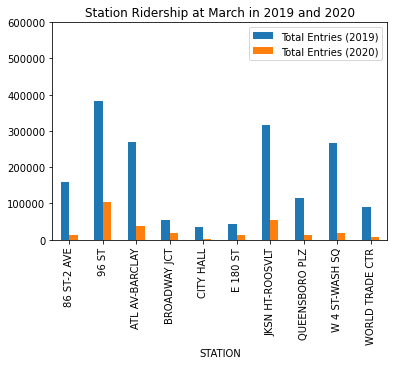

In [31]:
#the data for 2019 is much higher due to Chamber Street.
march_rider_chart = march_change.plot(kind = "bar", title = "Station Ridership at March in 2019 and 2020")
plt.ylim(0, 600000)

plt.savefig("Resources/Station Ridership at March in 2019 & 2020.png")
plt.show()

In [32]:
march_change2 = march_change.sort_values(by=["Percent Change (%)"])
#24352950 - 58450497 = -34,097,547
march_change2

,Total Entries (2019),Total Entries (2020),Percent Change (%)
STATION,,,
BROADWAY JCT,55019,18936,-65.58%
E 180 ST,44292,14040,-68.30%
96 ST,382718,104596,-72.67%
JKSN HT-ROOSVLT,317551,53313,-83.21%
ATL AV-BARCLAY,268299,37918,-85.87%
QUEENSBORO PLZ,114158,11877,-89.60%
86 ST-2 AVE,159528,12829,-91.96%
WORLD TRADE CTR,90873,6900,-92.41%
W 4 ST-WASH SQ,265487,18250,-93.13%


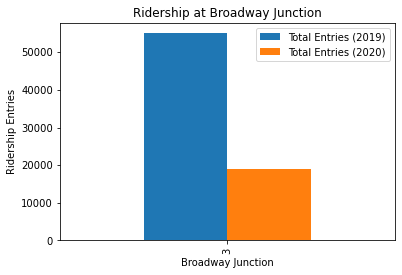

In [33]:
station_to_find = "BROADWAY JCT"
march_change = march_change.reset_index()

broadway_jct_df = march_change.loc[march_change["STATION"] == station_to_find]
station_chart = broadway_jct_df.plot(kind = "bar", title = "Ridership at Broadway Junction")

plt.xlabel("Broadway Junction")
plt.ylabel("Ridership Entries")
plt.savefig("Resources/Ridership at Broadway Junction in 2019 & 2020.png")
plt.show()

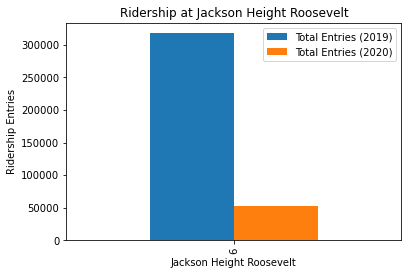

In [34]:
station_to_find = "JKSN HT-ROOSVLT"
jksn_roosvlt_df = march_change.loc[march_change["STATION"] == station_to_find]
station_chart = jksn_roosvlt_df.plot(kind = "bar", title = "Ridership at Jackson Height Roosevelt")

plt.xlabel("Jackson Height Roosevelt")
plt.ylabel("Ridership Entries")
plt.savefig("Resources/Ridership at Jackson Height Roosevelt in 2019 & 2020.png")
plt.show()

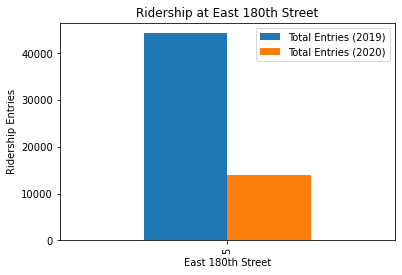

In [35]:
station_to_find = "E 180 ST"
east_180_df = march_change.loc[march_change["STATION"] == station_to_find]
station_chart = east_180_df.plot(kind = "bar", title = "Ridership at East 180th Street")

plt.xlabel("East 180th Street")
plt.ylabel("Ridership Entries")
plt.savefig("Resources/Ridership at East 180 Street in 2019 & 2020.png")
plt.show()